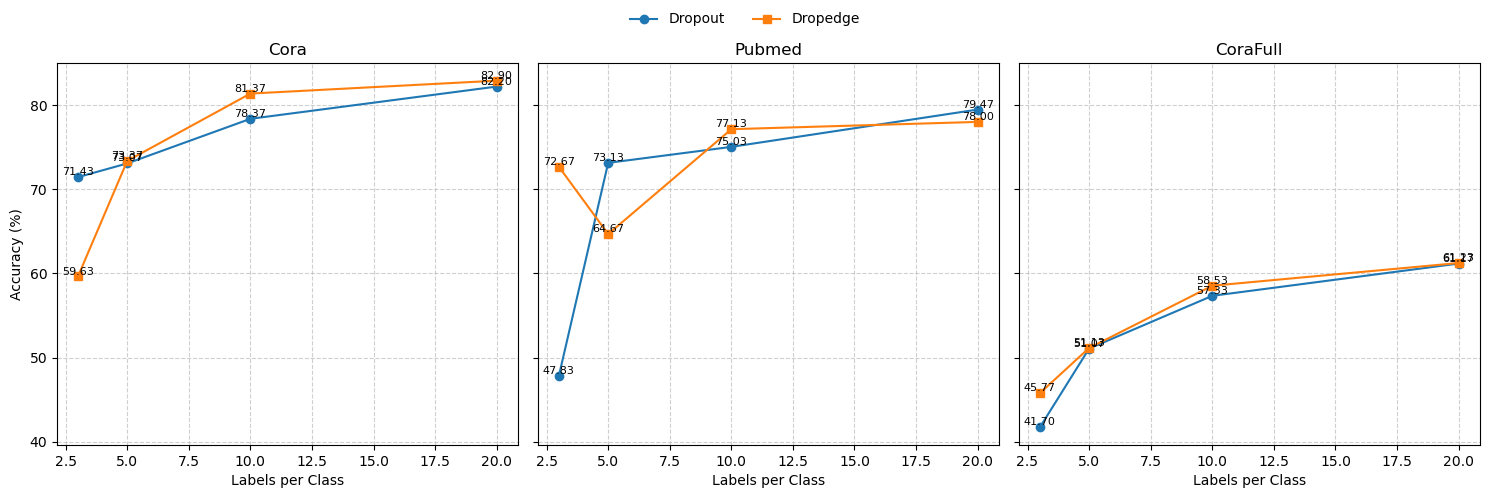

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Label rates
label_rates = [3, 5, 10, 20]

# Raw accuracy runs (fractions) for each dataset × method
runs = {
    'Cora Dropout':    [[0.6980, 0.7180, 0.7270],
                        [0.6690, 0.7430, 0.7800],
                        [0.7890, 0.7880, 0.7740],
                        [0.8120, 0.8280, 0.8260]],
    'Cora Dropedge':   [[0.5840, 0.6000, 0.6050],
                        [0.7340, 0.7330, 0.7340],
                        [0.8060, 0.8220, 0.8130],
                        [0.8150, 0.8320, 0.8400]],
    'Pubmed Dropout':  [[0.6100, 0.5060, 0.3190],
                        [0.7200, 0.7600, 0.7140],
                        [0.7330, 0.7600, 0.7580],
                        [0.7930, 0.8010, 0.7900]],
    'Pubmed Dropedge': [[0.7290, 0.7390, 0.7120],
                        [0.6710, 0.6620, 0.6070],
                        [0.7560, 0.7770, 0.7810],
                        [0.7850, 0.7850, 0.7700]],
    'CoraFull Dropout':[[0.4110, 0.4260, 0.4140],
                        [0.4970, 0.5240, 0.5110],
                        [0.5500, 0.5840, 0.5860],
                        [0.5990, 0.6200, 0.6160]],
    'CoraFull Dropedge':[[0.4460, 0.4610, 0.4660],
                         [0.4920, 0.5200, 0.5220],
                         [0.5680, 0.5960, 0.5920],
                         [0.6010, 0.6240, 0.6120]],
}

# Compute mean accuracy (%) at each label rate
means = {
    name: [np.mean(trials) * 100 for trials in trials_list]
    for name, trials_list in runs.items()
}

# Select datasets and split methods
datasets = ['Cora', 'Pubmed', 'CoraFull']
dropout_means = { ds: means[f'{ds} Dropout'] for ds in datasets }
dropedge_means = { ds: means[f'{ds} Dropedge'] for ds in datasets }

# Create a 1×3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for ax, ds in zip(axes, datasets):
    # Plot two lines: Dropout and Dropedge
    ax.plot(label_rates, dropout_means[ds], marker='o', label='Dropout')
    ax.plot(label_rates, dropedge_means[ds], marker='s', label='Dropedge')

    # Annotate each point
    for x, y in zip(label_rates, dropout_means[ds]):
        ax.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8)
    for x, y in zip(label_rates, dropedge_means[ds]):
        ax.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8)

    # Formatting
    ax.set_title(ds)
    ax.set_xlabel('Labels per Class')
    ax.grid(True, linestyle='--', alpha=0.6)


# Y-axis label on the first subplot
axes[0].set_ylabel('Accuracy (%)')
fig.legend(['Dropout', 'Dropedge'], loc='upper center', ncol=2, frameon=False)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


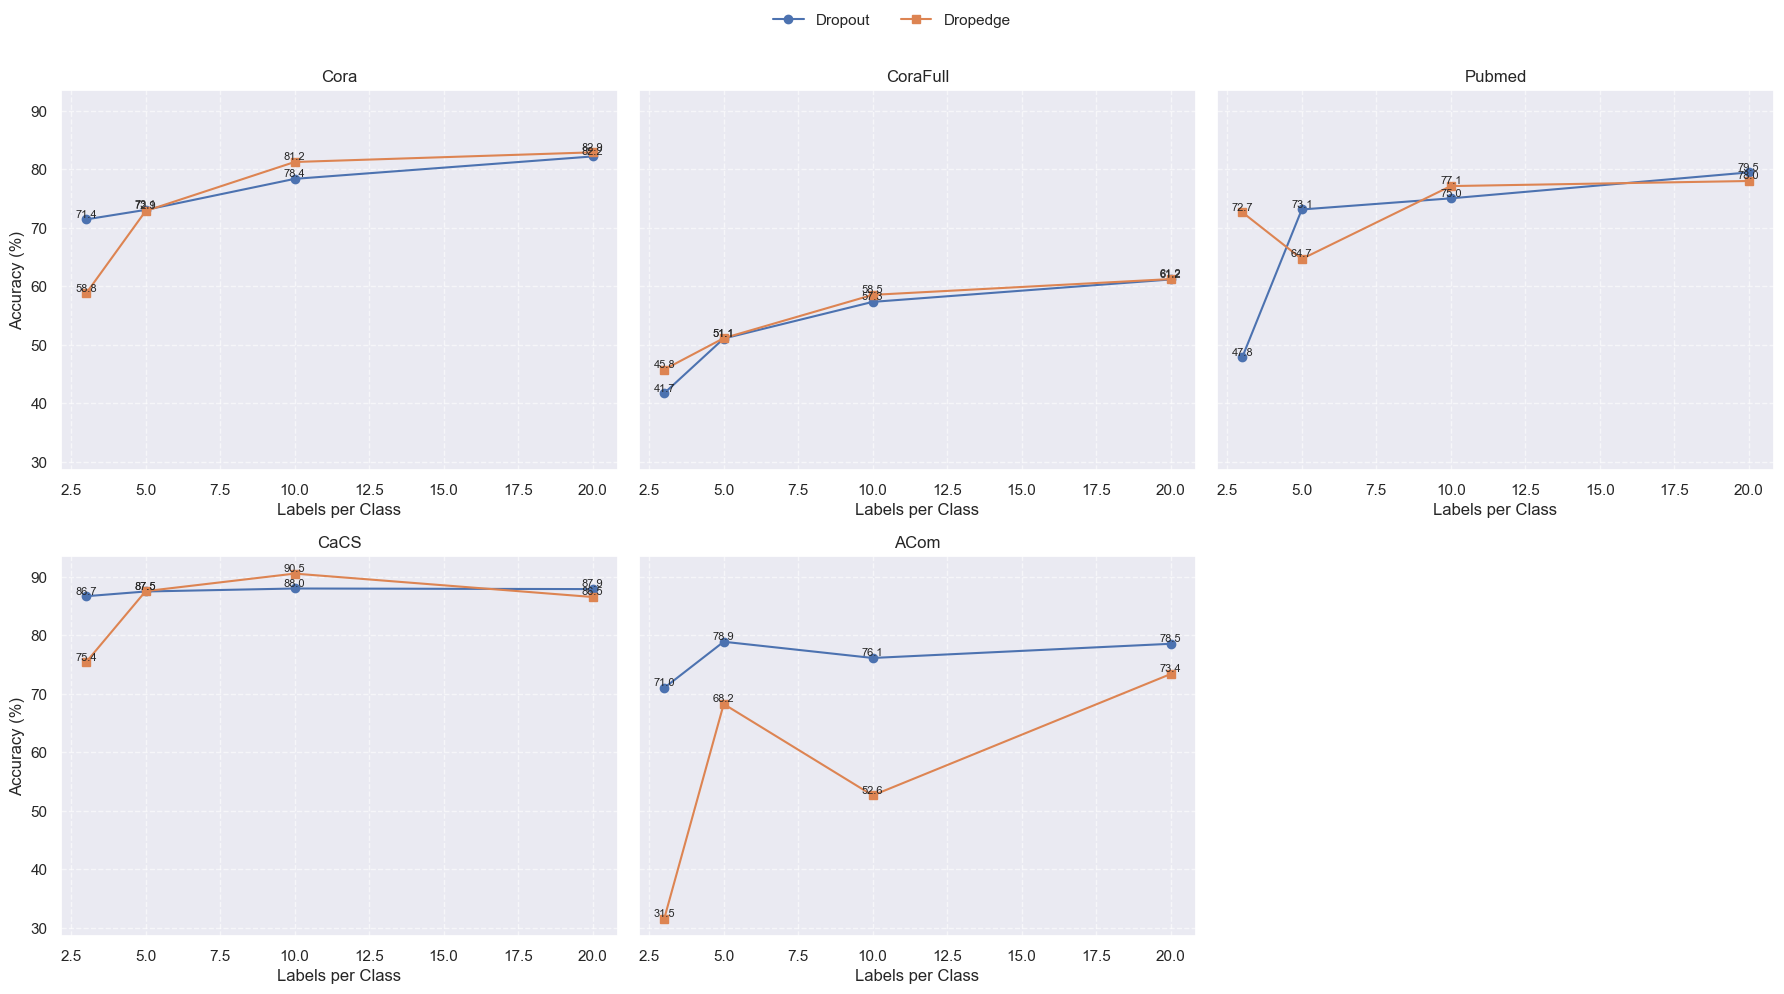

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Label rates
label_rates = [3, 5, 10, 20]

# Raw accuracy runs for each dataset × method
data = {
    'Cora': {
        'Dropout': {3:[0.6980,0.7180,0.7270], 5:[0.6690,0.7430,0.7800],
                    10:[0.7890,0.7880,0.7740], 20:[0.8120,0.8280,0.8260]},
        'Dropedge':{3:[0.5840,0.6000,0.6050,0.5620], 5:[0.7340,0.7330,0.7340,0.7140],
                    10:[0.8060,0.8220,0.8130,0.8090],20:[0.8150,0.8320,0.8400,0.8290]},
    },
    'CoraFull': {
        'Dropout': {3:[0.4110,0.4260,0.4140], 5:[0.4970,0.5240,0.5110],
                    10:[0.5500,0.5840,0.5860], 20:[0.5990,0.6200,0.6160]},
        'Dropedge':{3:[0.4460,0.4610,0.4660], 5:[0.4920,0.5200,0.5220],
                    10:[0.5680,0.5960,0.5920], 20:[0.6010,0.6240,0.6120]},
    },
    'Pubmed': {
        'Dropout': {3:[0.6100,0.5060,0.3190], 5:[0.7200,0.7600,0.7140],
                    10:[0.7330,0.7600,0.7580],20:[0.7930,0.8010,0.7900]},
        'Dropedge':{3:[0.7290,0.7390,0.7120], 5:[0.6710,0.6620,0.6070],
                    10:[0.7560,0.7770,0.7810],20:[0.7850,0.7850,0.7700]},
    },
    'CaCS': {
        'Dropout': {3:[0.8637,0.8596,0.8772], 5:[0.8772,0.8663,0.8812],
                    10:[0.8840,0.8823,0.8738],20:[0.8963,0.8580,0.8827]},
        'Dropedge':{3:[0.8210,0.7950,0.7610,0.6390],5:[0.8610,0.8790,0.8790,0.8830],
                    10:[0.9160,0.9110,0.8980,0.8970],20:[0.8920,0.8740,0.8530,0.8430]},
    },
    'ACom': {
        'Dropout': {3:[0.7350,0.7490,0.6780,0.6780],5:[0.8030,0.7880,0.7910,0.7740],
                    10:[0.7730,0.7940,0.7560,0.7220],20:[0.8140,0.7810,0.7640,0.7830]},
        'Dropedge':{3:[0.7200,0.1800,0.1800,0.1800],5:[0.7800,0.7680,0.6420,0.5400],
                    10:[0.7710,0.7550,0.3980,0.1810],20:[0.8100,0.7940,0.7150,0.6160]},
    }
}

# Compute mean accuracy (%) at each label rate
mean_data = {
    ds: {
        method: [np.mean(data[ds][method][lr]) * 100 for lr in label_rates]
        for method in data[ds]
    }
    for ds in data
}

# Create 2×3 subplots (grid of six), share y-axis
datasets = list(mean_data.keys())
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for i, ds in enumerate(datasets):
    ax = axes[i]
    dropout_vals = mean_data[ds]['Dropout']
    dropedge_vals = mean_data[ds]['Dropedge']

    # Plot lines
    ax.plot(label_rates, dropout_vals, marker='o', label='Dropout')
    ax.plot(label_rates, dropedge_vals, marker='s', label='Dropedge')

    # Annotate points
    for x, y in zip(label_rates, dropout_vals):
        ax.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=8)
    for x, y in zip(label_rates, dropedge_vals):
        ax.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=8)

    ax.set_title(ds)
    ax.set_xlabel('Labels per Class')
    ax.grid(True, linestyle='--', alpha=0.6)

# Hide the sixth unused subplot
axes[-1].axis('off')

# Y-axis label on leftmost plots
for ax in (axes[0], axes[3]):
    ax.set_ylabel('Accuracy (%)')

fig.legend(['Dropout', 'Dropedge'], loc='upper center', ncol=2, frameon=False)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


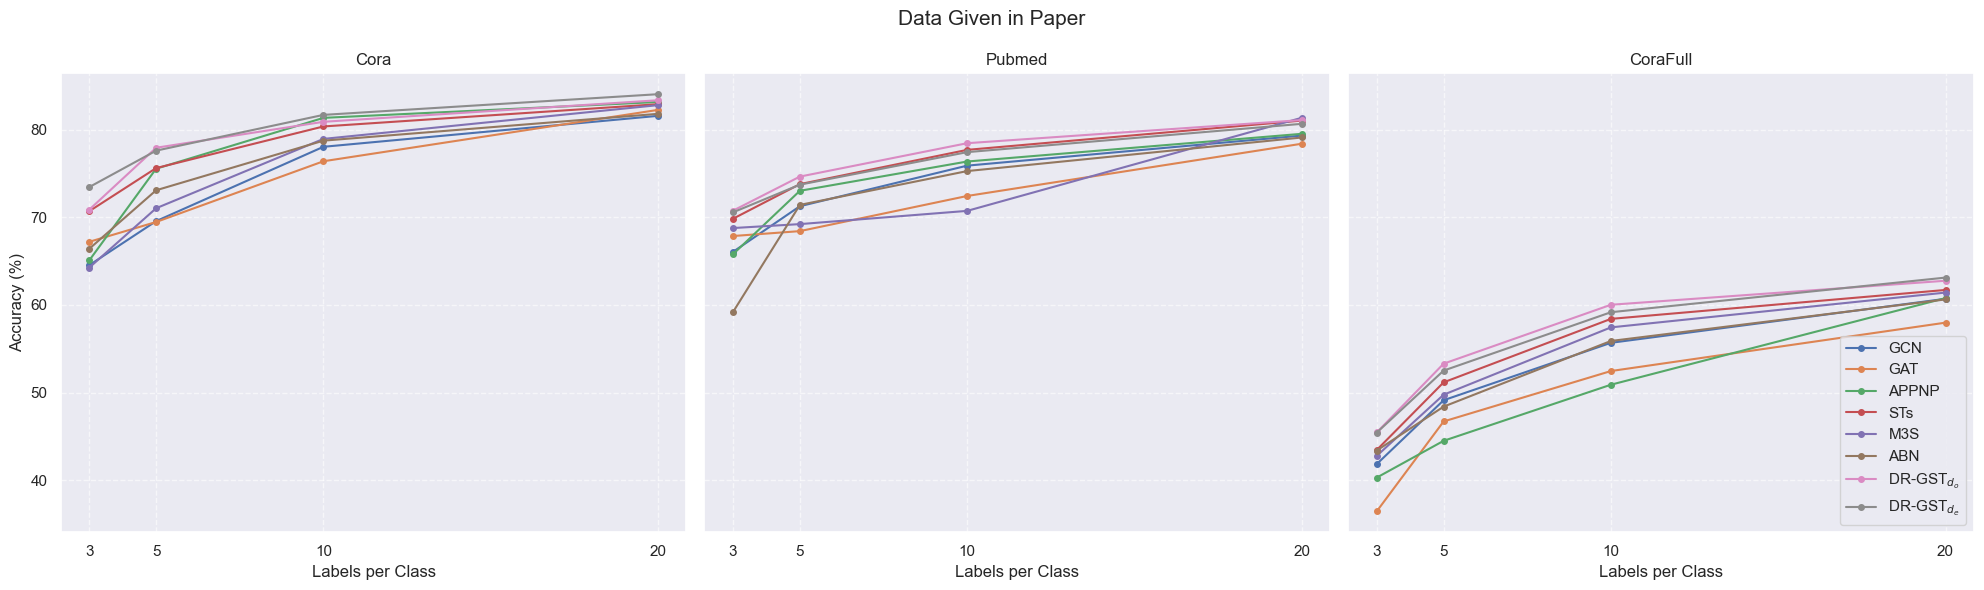

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Labels per class
labels = [3, 5, 10, 20]

# All methods' accuracies for the three datasets
accuracy = {
    'GCN':           {'Cora':[64.52,69.55,78.03,81.56],
                      'Pubmed':[66.04,71.25,75.88,79.31],
                      'CoraFull':[41.83,49.12,55.67,60.69]},
    'GAT':           {'Cora':[67.19,69.45,76.38,82.24],
                      'Pubmed':[67.85,68.41,72.42,78.38],
                      'CoraFull':[36.44,46.70,52.45,57.97]},
    'APPNP':         {'Cora':[65.06,75.53,81.33,83.14],
                      'Pubmed':[65.77,73.01,76.35,79.51],
                      'CoraFull':[40.29,44.49,50.89,60.77]},
    'STs':           {'Cora':[70.68,75.60,80.35,82.89],
                      'Pubmed':[69.82,73.77,77.68,81.02],
                      'CoraFull':[43.44,51.16,58.40,61.70]},
    'M3S':           {'Cora':[64.24,71.02,78.93,82.78],
                      'Pubmed':[68.76,69.21,70.72,81.34],
                      'CoraFull':[42.77,49.75,57.43,61.40]},
    'ABN':           {'Cora':[66.39,73.07,78.73,81.79],
                      'Pubmed':[59.17,71.40,75.26,79.09],
                      'CoraFull':[43.38,48.39,55.88,60.62]},
    'DR-GST$_{d_o}$':{'Cora':[70.85,77.92,80.88,83.34],
                      'Pubmed':[70.74,74.63,78.44,81.08],
                      'CoraFull':[45.44,53.29,60.01,62.75]},
    'DR-GST$_{d_e}$':{'Cora':[73.43,77.59,81.67,84.03],
                      'Pubmed':[70.55,73.71,77.42,80.65],
                      'CoraFull':[45.42,52.50,59.16,63.11]},
}

datasets = ['Cora', 'Pubmed', 'CoraFull']

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

for ax, ds in zip(axes, datasets):
    for method, vals in accuracy.items():
        ax.plot(labels, vals[ds], marker='o', markersize=4, linewidth=1.5, label=method)
    ax.set_title(ds)
    ax.set_xlabel('Labels per Class')
    ax.grid(True, linestyle='--', alpha=0.6)
    #ax.legend(fontsize=8, loc='lower right')
    ax.set_xticks(label_rates)

axes[0].set_ylabel('Accuracy (%)')
axes[-1].legend(loc='lower right', bbox_to_anchor=(1, 0))
# Add a grand title
fig.suptitle('Data Given in Paper', fontsize=15, y=0.98)

plt.tight_layout()
plt.show()


In [4]:
data = {
    'CaCS': {
        'Dropout': {
            3: [[0.4889, 0.8637], [0.6038, 0.8596], [0.5187, 0.8772]],
            5: [[0.5187, 0.8772], [0.5201, 0.8663], [0.5244, 0.8812]],
            10: [[0.4442, 0.8840], [0.5079, 0.8823], [0.5653, 0.8738]],
            20: [[0.4089, 0.8963], [0.6159, 0.8580], [0.4865, 0.8827]],
        },
        'Dropedge': {
            3: [[0.6392, 0.8210], [0.7226, 0.7950], [0.9751, 0.7610], [1.4761, 0.6390]],
            5: [[0.5132, 0.8610], [0.4742, 0.8790], [0.4975, 0.8790], [0.4849, 0.8830]],
            10: [[0.3360, 0.9160], [0.3542, 0.9110], [0.4152, 0.8980], [0.4708, 0.8970]],
            20: [[0.3747, 0.8920], [0.4287, 0.8740], [0.4910, 0.8530], [0.5278, 0.8430]],
        },
        'GCN': {
            3: [[0.5658, 0.8480]],
            5: [[0.4329, 0.8870]],
            10: [[0.3696, 0.9000]],
            20: [[0.3554, 0.9030]],
        },
        'GAT': {
            3: [[1.0291, 0.8000]],
            5: [[0.7236, 0.8600]],
            10: [[0.6208, 0.8810]],
            20: [[0.7251, 0.8890]],
        },
        'APPNP': {
            3: [[0.4682, 0.8860]],
            5: [[0.6656, 0.8070]],
            10: [[0.3596, 0.9010]],
            20: [[0.3557, 0.8990]],
        },
        'STs': {
            3: [
                [0.8591, 0.8030], [0.8985, 0.7610], [1.5569, 0.6760], [1.8177, 0.5440],
                [2.0161, 0.6140], [2.3482, 0.4630], [2.5531, 0.4540], [2.5617, 0.4520],
                [2.5603, 0.4510], [2.5603, 0.4500]
            ],
            5: [
                [0.3998, 0.8970], [0.3922, 0.9040], [0.4296, 0.8850], [0.5155, 0.8810],
                [0.5054, 0.8720], [0.5327, 0.8820], [0.5775, 0.8820], [0.6216, 0.8780],
                [0.5257, 0.8840], [0.6237, 0.8840]
            ],
            10: [
                [0.5249, 0.8570], [0.6370, 0.8460], [0.7957, 0.8680], [0.9491, 0.7870],
                [0.9310, 0.8260], [1.1226, 0.7700], [1.1586, 0.7980], [1.2873, 0.7370],
                [1.6595, 0.5380], [0.9091, 0.7720]
            ],
            20: [
                [0.3602, 0.9090], [0.3649, 0.9120], [0.4036, 0.9240], [0.3690, 0.9110],
                [0.4236, 0.9100], [0.3935, 0.9010], [0.4046, 0.9120], [0.4126, 0.9070],
                [0.4292, 0.9090], [0.4260, 0.9090]
            ],
        },
        'ABN': {
            3: [[2.4318, 0.3520]],
            5: [[2.5677, 0.2230]],
            10: [[2.9680, 0.1790]],
            20: [[2.4898, 0.2980]],
        },
        'M3S': {
            3: [
                [0.6713, 0.8130], [0.4532, 0.8800], [0.5478, 0.8810], [0.4422, 0.8910],
                [0.4605, 0.8890], [0.4699, 0.8870], [0.4766, 0.8850], [0.4802, 0.8850],
                [0.5310, 0.8890], [0.4769, 0.8910]
            ],
            5: [
                [0.5630, 0.8570], [0.4511, 0.8870], [0.4558, 0.8820], [0.4579, 0.8800],
                [0.4367, 0.8840], [0.4373, 0.8850], [0.4382, 0.8850], [0.4384, 0.8850],
                [0.4385, 0.8850], [0.4386, 0.8850]
            ],
            10: [
                [0.3981, 0.8930], [0.3706, 0.9020], [0.3586, 0.9000], [0.3574, 0.9030],
                [0.3565, 0.9020], [0.3564, 0.9010], [0.3566, 0.9000], [0.3562, 0.9010],
                [0.3564, 0.9010], [0.3564, 0.9010]
            ],
            20: [
                [0.3423, 0.9060], [0.3305, 0.9220], [0.3397, 0.9230], [0.3426, 0.9200],
                [0.3436, 0.9210], [0.3439, 0.9210], [0.3449, 0.9180], [0.3446, 0.9180],
                [0.3448, 0.9170], [0.3448, 0.9170]
            ],
        },
    },
    'ACom': {
        'Dropout': {
            3: [[1.0251, 0.7350], [1.0326, 0.7490], [1.2210, 0.6780], [1.5114, 0.6780]],
            5: [[0.7825, 0.8030], [0.8281, 0.7880], [0.8372, 0.7910], [0.7835, 0.7740]],
            10: [[0.8251, 0.7730], [0.8082, 0.7940], [1.1841, 0.7560], [1.3138, 0.7220]],
            20: [[0.6532, 0.8140], [1.0792, 0.7810], [1.3341, 0.7640], [1.2519, 0.7830]],
        },
        'Dropedge': {
            3: [[1.0084, 0.7200], [6.6291, 0.1800], [10.3088, 0.1800], [12.4792, 0.1800]],
            5: [[0.9937, 0.7800], [0.8792, 0.7680], [1.6678, 0.6420], [5.0238, 0.5400]],
            10: [[0.7994, 0.7710], [1.2362, 0.7550], [3.0924, 0.3980], [7.9170, 0.1810]],
            20: [[0.7890, 0.8100], [1.6414, 0.7940], [1.3960, 0.7150], [4.6944, 0.6160]],
        },
        'GCN': {
            3: [[1.2485, 0.7070]],
            5: [[0.7858, 0.7790]],
            10: [[0.8562, 0.7860]],
            # no 20 for GCN on ACom
        },
        'GAT': {
            3: [[1.2190, 0.7330]],
            5: [[1.1500, 0.7100]],
            10: [[0.7595, 0.7930]],
            20: [[0.5831, 0.8470]],
        },
        'APPNP': {
            3: [[1.0032, 0.7300]],
            5: [[1.1154, 0.7090]],
            10: [[0.7203, 0.8190]],
            20: [[0.7744, 0.8140]],
        },
        'STs': {
            3: [
                [1.5794, 0.6490], [1.2850, 0.6790], [1.8065, 0.6710], [1.6761, 0.6740],
                [1.6618, 0.6720], [1.7954, 0.6730], [1.8081, 0.6650], [2.3862, 0.6820],
                [2.8857, 0.6720], [2.6870, 0.6710]
            ],
            5: [
                [0.8056, 0.7940], [0.8400, 0.7920], [1.0423, 0.7700], [1.2643, 0.7590],
                [1.2583, 0.7390], [1.3437, 0.7340], [1.5750, 0.7250], [1.4589, 0.7190],
                [1.3874, 0.7160], [1.4414, 0.7070]
            ],
            10: [
                [0.8236, 0.7460], [0.8656, 0.7740], [0.9151, 0.7440], [1.1790, 0.7050],
                [1.3172, 0.6930], [1.5291, 0.6600], [1.6612, 0.6540], [2.2543, 0.6420],
                [3.0070, 0.6480], [3.4125, 0.6100]
            ],
            20: [
                [0.6685, 0.8190], [0.7820, 0.8290], [0.8757, 0.8020], [0.8807, 0.7980],
                [0.8617, 0.7840], [1.1370, 0.7590], [1.2111, 0.7130], [1.3714, 0.7110],
                [1.7398, 0.7310], [1.8566, 0.6890]
            ],
        },
        'ABN': {
            3: [[2.7378, 0.1360]],
            5: [[2.0313, 0.5230]],
            10: [[2.8595, 0.1890]],
            20: [[0.5633, 0.9030]],
        },
        'M3S': {
            3: [
                [1.0428, 0.7300], [0.9405, 0.7530], [0.9375, 0.7680], [0.9510, 0.7600],
                [0.8736, 0.7670], [0.9084, 0.7610], [0.8822, 0.7610], [0.9212, 0.7460],
                [0.9196, 0.7470], [0.8931, 0.7630]
            ],
            5: [
                [1.1479, 0.7000], [1.0217, 0.7120], [1.1603, 0.7100], [1.1688, 0.7120],
                [1.0728, 0.7140], [1.0425, 0.7190], [1.0941, 0.7170], [1.0940, 0.7170],
                [0.9513, 0.7200], [1.0416, 0.7270]
            ],
            10: [
                [0.8226, 0.7730], [0.8858, 0.7610], [0.8829, 0.7680], [0.8948, 0.7740],
                [0.9065, 0.7540], [0.9590, 0.7630], [0.9470, 0.7630], [0.9929, 0.7560],
                [0.9929, 0.7510], [1.0496, 0.7620]
            ],
            20: [
                [0.6417, 0.8160], [0.7695, 0.8090], [0.8202, 0.7980], [0.8286, 0.7960],
                [0.7784, 0.8000], [0.8124, 0.8010], [0.8036, 0.8060], [0.8295, 0.7960],
                [0.8185, 0.7960], [0.8082, 0.7970]
            ],
        },
    }
}


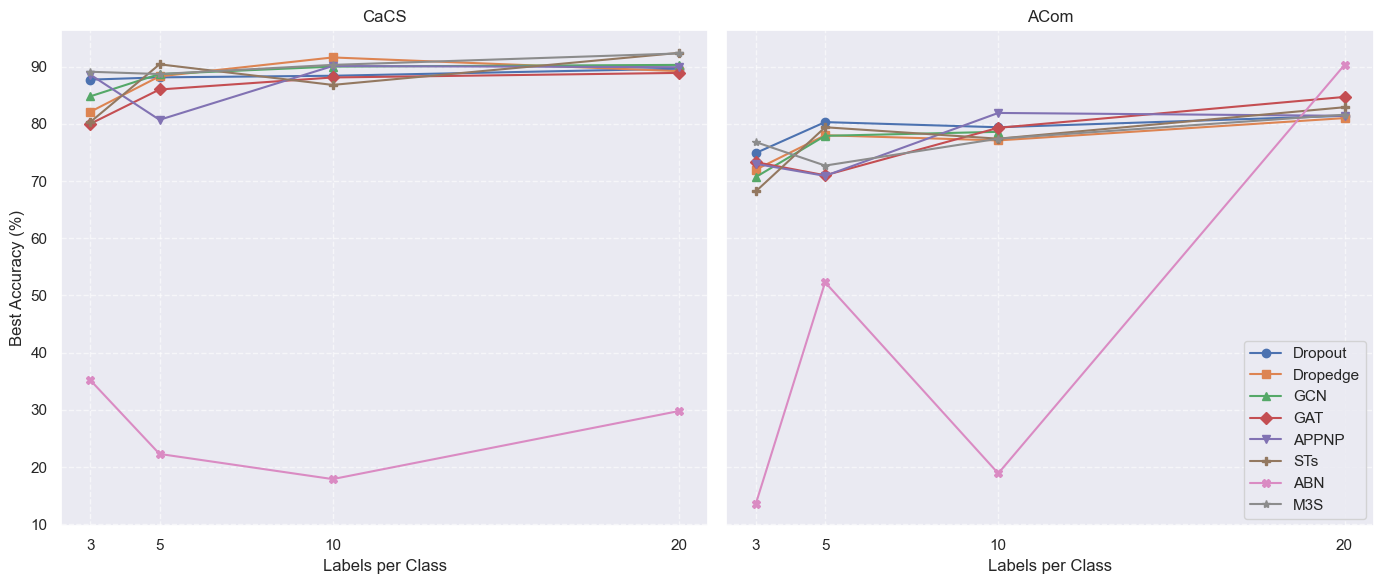

In [5]:
# Assume 'data' dict is defined as in your previous cell
label_rates = [3, 5, 10, 20]

# Compute max accuracy for each method and label rate
max_data = {}
for ds in ['CaCS', 'ACom']:
    max_data[ds] = {}
    for method, lr_dict in data[ds].items():
        max_data[ds][method] = [
            (np.max([run[1] for run in lr_dict[lr]]) * 100) if lr in lr_dict and lr_dict[lr] else np.nan
            for lr in label_rates
        ]

# Plotting 1×2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
markers = ['o', 's', '^', 'D', 'v', 'P', 'X', '*']

for ax, ds in zip(axes, ['CaCS', 'ACom']):
    for mk, method in zip(markers, max_data[ds].keys()):
        ax.plot(label_rates, max_data[ds][method], marker=mk, label=method)
    ax.set_title(ds)
    ax.set_xlabel('Labels per Class')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_xticks(label_rates)

axes[0].set_ylabel('Best Accuracy (%)')
axes[1].legend(loc='lower right', bbox_to_anchor=(1, 0))

plt.tight_layout()

In [6]:
data_2 = {
    'Cora': {
        'Dropout': {
            3: [[1.0757, 0.6980], [0.9032, 0.7180], [0.9236, 0.7270]],
            5: [[1.0225, 0.6690], [0.8474, 0.7430], [0.7762, 0.7800]],
            10: [[0.6735, 0.7890], [0.7090, 0.7880], [0.7066, 0.7740]],
            20: [[0.6160, 0.8120], [0.5612, 0.8280], [0.5553, 0.8260]],
        },
        'Dropedge': {
            3: [[1.2764, 0.5840], [1.2701, 0.6000], [1.3112, 0.6050], [1.7294, 0.5620]],
            5: [[0.9150, 0.7340], [0.8562, 0.7330], [0.8861, 0.7340], [1.0144, 0.7140]],
            10: [[0.6976, 0.8060], [0.6062, 0.8220], [0.6163, 0.8130], [0.6231, 0.8090]],
            20: [[0.6117, 0.8150], [0.5604, 0.8320], [0.5578, 0.8400], [0.5671, 0.8290]],
        },
        'STs': {
            3: [[1.2349, 0.6370], [1.0075, 0.7020], [0.9428, 0.7030], [0.9449, 0.7010], [0.9892, 0.6920],
                [1.0578, 0.6670], [1.2316, 0.6610], [1.3196, 0.6530], [1.3837, 0.6480], [1.4072, 0.6490]],
            5: [[1.1087, 0.6340], [1.1375, 0.5920], [1.2366, 0.5650], [1.3742, 0.5570], [1.5968, 0.5520],
                [1.7537, 0.5330], [1.9125, 0.5280], [1.9952, 0.1440], [1.1087, 0.6340], [1.1375, 0.5920]],
            10: [[0.7765, 0.7720], [0.7081, 0.7840], [0.7164, 0.7790], [0.7087, 0.7880], [0.7210, 0.7840],
                 [0.7352, 0.7750], [0.7569, 0.7690], [0.8026, 0.7500], [0.8528, 0.7080], [0.8791, 0.7050]],
            20: [[0.6564, 0.8140], [0.5976, 0.8190], [0.6061, 0.8240], [0.6084, 0.8300], [0.6053, 0.8260],
                 [0.6045, 0.8270], [0.6110, 0.8250], [0.6111, 0.8240], [0.6125, 0.8260], [0.6122, 0.8250]],
        },
        'ABN': {
            3: [[1.8806, 0.2030]],
            5: [[1.8213, 0.4100]],
            10: [[1.4952, 0.4160]],
            20: [[1.6204, 0.5560]],
        },
        'GCN': {
            3: [[0.9797, 0.7610]],
            5: [[1.0147, 0.6790]],
            10: [[0.8113, 0.7660]],
            20: [[0.6652, 0.8110]],
        },
        'GAT': {
            3: [[1.1806, 0.6160]],
            5: [[0.9729, 0.6690]],
            10: [[0.7690, 0.7620]],
            20: [[0.6353, 0.8160]],
        },
        'M3S': {
            3: [[1.0546, 0.6850]],
            5: [[0.9154, 0.7220]],
            10: [[0.7195, 0.8050]],
            20: [[0.6116, 0.8330]],
            },
        'APPNP': {
            3: [[1.0668, 0.6820]],
            5: [[0.9730, 0.6890]],
            10: [[0.7354, 0.8190]],
            20: [[0.6087, 0.8340]],
        }
    },
    'Pubmed': {
        'Dropout': {
            3: [[0.8418, 0.6100], [1.0635, 0.5060], [1.1134, 0.3190]],
            5: [[0.7054, 0.7200], [0.6242, 0.7600], [0.6761, 0.7140]],
            10: [[0.6637, 0.7330], [0.6075, 0.7600], [0.6124, 0.7580]],
            20: [[0.5520, 0.7930], [0.5207, 0.8010], [0.5455, 0.7900]],
        },
        'Dropedge': {
            3: [[0.6992, 0.7290], [0.6831, 0.7390], [0.7030, 0.7120]],
            5: [[0.7701, 0.6710], [0.7845, 0.6620], [0.9509, 0.6070]],
            10: [[0.5877, 0.7560], [0.5520, 0.7770], [0.5505, 0.7810]],
            20: [[0.5566, 0.7850], [0.5462, 0.7850], [0.6033, 0.7700]],
        },
        'STs': {
            3: [[0.7317, 0.7310], [0.6797, 0.7420], [0.7078, 0.7290], [0.7873, 0.6990], [0.8942, 0.6230],
                [1.0905, 0.4130], [0.7369, 0.7120], [0.6861, 0.7500], [0.7381, 0.7240], [0.8703, 0.6430]],
            5: [[0.7654, 0.6710], [0.9207, 0.6150], [1.1030, 0.4130], [1.2504, 0.4130], [0.8990, 0.6370],
                [1.2040, 0.4130], [1.2519, 0.4130], [0.8893, 0.6550], [1.0399, 0.5830], [1.2210, 0.4130]],
            10: [[0.6578, 0.7340], [0.6255, 0.7590], [0.6270, 0.7630], [0.6356, 0.7520], [0.6581, 0.7390],
                 [0.7150, 0.7270], [0.7941, 0.7110], [0.8774, 0.6870], [1.0548, 0.4680], [1.0887, 0.3960]],
            20: [[0.5489, 0.8010], [0.5101, 0.8110], [0.5174, 0.8100], [0.5389, 0.8060], [0.5744, 0.7940],
                 [0.6288, 0.7570], [0.7257, 0.7280], [0.8742, 0.6880], [1.0872, 0.4130], [0.8107, 0.6910]],
        },
        'ABN': {
            3: [[1.0920, 0.4170]],
            5: [[1.1114, 0.2250]],
            10: [[1.1348, 0.4070]],
            20: [[1.1658, 0.4130]],
        },
        'GCN': {
            3: [[0.8332, 0.6090]],
            5: [[0.7476, 0.6900]],
            10: [[0.6140, 0.7430]],
            20: [[0.5525, 0.7960]],
        },
        'GAT': {
            3: [[0.7695, 0.6550]],
            5: [[0.7097, 0.6900]],
            10: [[0.6829, 0.7180]],
            20: [[0.6299, 0.7430]],
        },
        'M3S': {
            3: [[0.7833, 0.7200]],
            5: [[0.8031, 0.6610]],
            10: [[0.5955, 0.7870]],
            20: [[0.5445, 0.8210]],
        },
        'APPNP': {
            3: [[0.7061, 0.7340]],
            5: [[0.6770, 0.7120]],
            10: [[0.5912, 0.7910]],
            20: [[0.5322, 0.7990]],
        }
    }
}

data_2['CoraFull'] = {
    'Dropout': {
        3: [[2.4062, 0.4110], [2.4331, 0.4260], [2.5865, 0.4140]],
        5: [[2.0325, 0.4970], [1.9228, 0.5240], [2.2130, 0.5110]],
        10: [[1.8340, 0.5500], [1.7392, 0.5840], [1.7492, 0.5860]],
        20: [[1.5661, 0.5990], [1.5501, 0.6200], [1.5872, 0.6160]],
    },
    'Dropedge': {
        3: [[2.3282, 0.4460], [2.2593, 0.4610], [2.6969, 0.4660]],
        5: [[2.0994, 0.4920], [1.9570, 0.5200], [2.0159, 0.5220]],
        10: [[1.7631, 0.5680], [1.6843, 0.5960], [1.7170, 0.5920]],
        20: [[1.5605, 0.6010], [1.4944, 0.6240], [1.5767, 0.6120]],
    },
    'STs': {
        3: [[2.4648, 0.4410], [2.4451, 0.4480], [2.5301, 0.4340], [2.8088, 0.3770], [3.1204, 0.3380],
            [3.4745, 0.3110], [3.8017, 0.2820], [4.1977, 0.0720], [2.4648, 0.4410], [2.4451, 0.4480]],
        5: [[2.1739, 0.4880], [2.1686, 0.5110], [2.2461, 0.4860], [2.4400, 0.4330], [2.7446, 0.3910],
            [2.9724, 0.3840], [3.1181, 0.3730], [3.2682, 0.3580], [3.4334, 0.3430], [3.6935, 0.3170]],
        10: [[1.8562, 0.5550], [1.8690, 0.5790], [1.8998, 0.5690], [1.9667, 0.5430], [2.1243, 0.4900],
             [2.3050, 0.4620], [2.5008, 0.4320], [2.6238, 0.4220], [2.7290, 0.4130], [2.8413, 0.4030]],
        20: [[1.6635, 0.6020], [1.6958, 0.6130], [1.7187, 0.6140], [1.7664, 0.6030], [1.8447, 0.5880],
             [1.9171, 0.5660], [2.0118, 0.5300], [2.0612, 0.5170], [2.1081, 0.4990], [2.1681, 0.4910]],
    },
    'ABN': {
        3: [[3.6586, 0.0620]],
        5: [[3.4421, 0.2120]],
        10: [[3.1290, 0.3060]],
        20: [[3.0276, 0.3790]],
    },
    'GCN': {
        3: [[2.4661, 0.3980]],
        5: [[2.2346, 0.4300]],
        10: [[1.8556, 0.5150]],
        20: [[1.6521, 0.5840]],
    },
    'GAT': {
        3: [[2.4661, 0.3980]],
        5: [[2.2346, 0.4300]],
        10: [[1.8556, 0.5150]],
        20: [[1.6521, 0.5840]],
    },
    'M3S': {
        3: [[2.9324, 0.4390]],
        5: [[2.2773, 0.5140]],
        10: [[1.8570, 0.5630]],
        20: [[1.7555, 0.6210]],
        },
    'APPNP': {
        3: [[2.3153, 0.4480]],
        5: [[2.0361, 0.5220]],
        10: [[1.8851, 0.5600]],
        20: [[1.684, 0.6100]]
    }
}


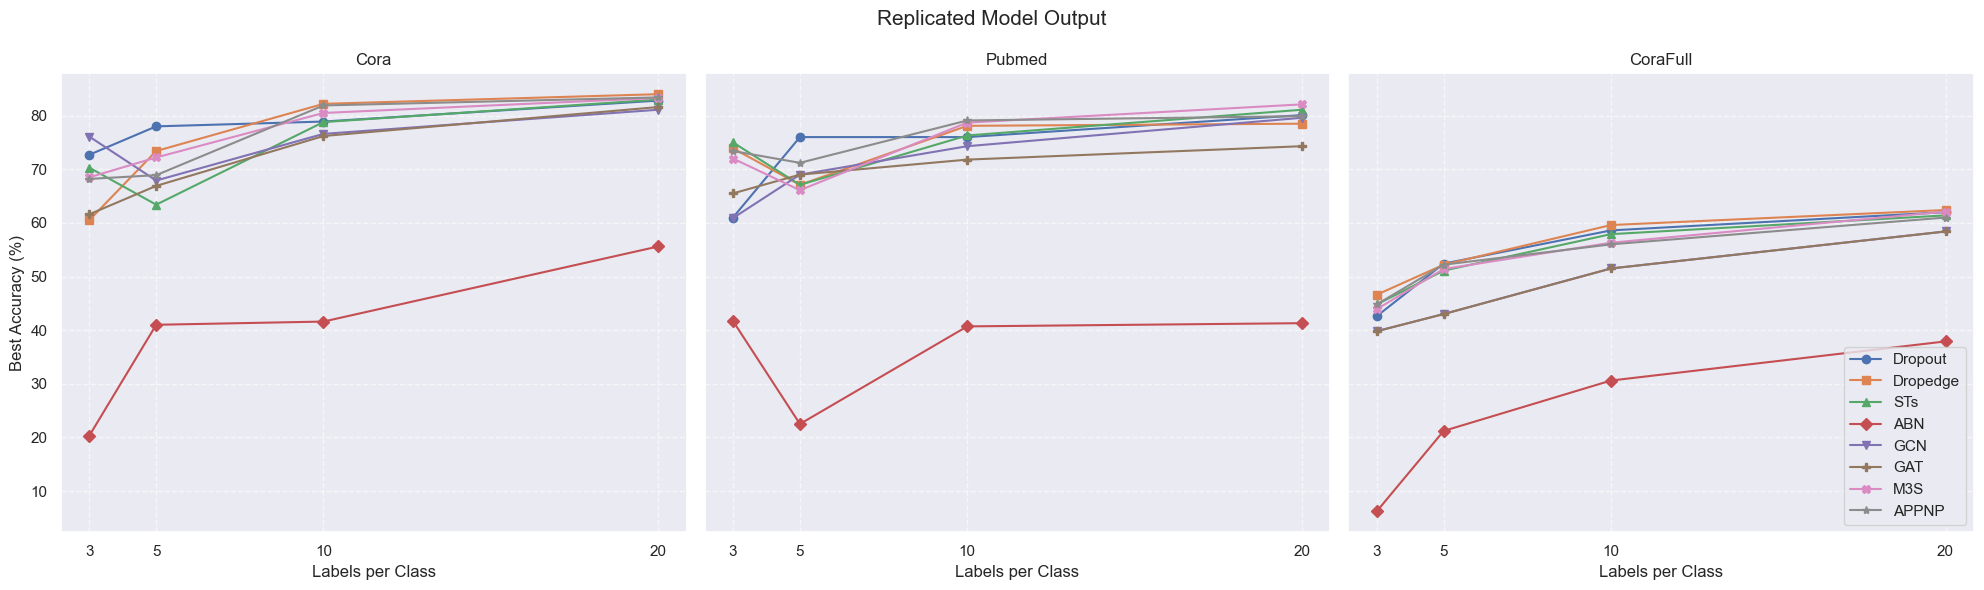

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Prepare max accuracy data for Cora, Pubmed, and CoraFull
label_rates = [3, 5, 10, 20]
max_data = {}

for ds in ['Cora', 'Pubmed', 'CoraFull']:
    max_data[ds] = {}
    for method, lr_dict in data_2[ds].items():
        max_data[ds][method] = [
            (np.max([run[1] for run in lr_dict[lr]]) * 100) if lr in lr_dict and lr_dict[lr] else np.nan
            for lr in label_rates
        ]
mean_data = {}

for ds in ['Cora', 'Pubmed', 'CoraFull']:
    mean_data[ds] = {}
    for method, lr_dict in data_2[ds].items():
        mean_data[ds][method] = [
            (np.mean([run[1] for run in lr_dict[lr]]) * 100) if lr in lr_dict and lr_dict[lr] else np.nan
            for lr in label_rates
        ]

# Plotting 1×3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
markers = ['o', 's', '^', 'D', 'v', 'P', 'X', '*']

for ax, ds in zip(axes, ['Cora', 'Pubmed', 'CoraFull']):
    for mk, method in zip(markers, max_data[ds].keys()):
        ax.plot(label_rates, max_data[ds][method], marker=mk, label=method)
    ax.set_title(ds)
    ax.set_xlabel('Labels per Class')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_xticks(label_rates)
# for ax, ds in zip(axes, ['Cora', 'Pubmed', 'CoraFull']):
#     for mk, method in zip(markers, mean_data[ds].keys()):
#         ax.plot(label_rates, mean_data[ds][method], marker=mk, label=method)
#     ax.set_title(ds)
#     ax.set_xlabel('Labels per Class')
#     ax.grid(True, linestyle='--', alpha=0.6)
#     ax.set_xticks(label_rates)

axes[0].set_ylabel('Best Accuracy (%)')
axes[-1].legend(loc='lower right', bbox_to_anchor=(1, 0))
fig.suptitle('Replicated Model Output', fontsize=15, y=0.98)
plt.tight_layout()
plt.show()


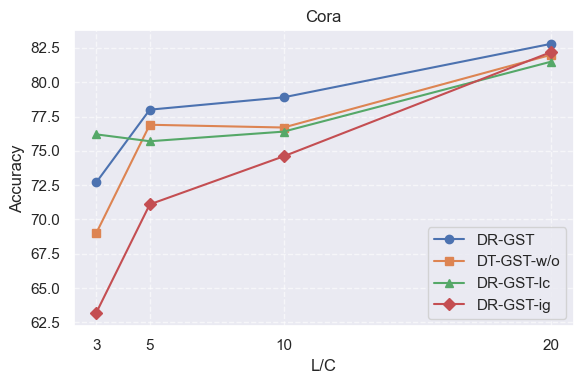

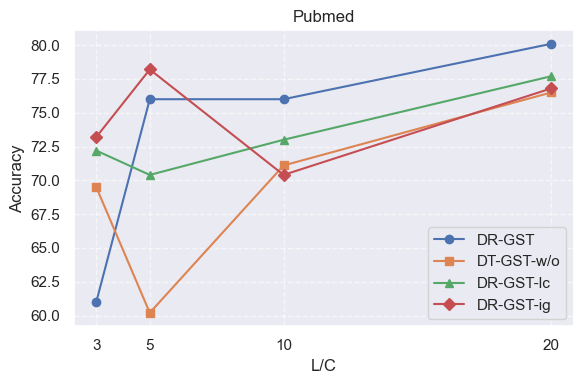

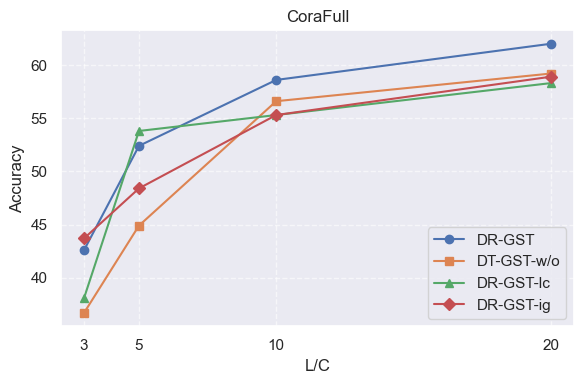

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
label_rates = [3, 5, 10, 20]
data_3  = {'Cora':{
            'Dropout':{
            3: [[1.0757, 0.6980], [0.9032, 0.7180], [0.9236, 0.7270]],
            5: [[1.0225, 0.6690], [0.8474, 0.7430], [0.7762, 0.7800]],
            10: [[0.6735, 0.7890], [0.7090, 0.7880], [0.7066, 0.7740]],
            20: [[0.6160, 0.8120], [0.5612, 0.8280], [0.5553, 0.8260]],
        },
        'clean':{
            3:[[1.1043,0.6390],[1.0311,0.6850],[1.0550,0.6900]],
            5:[[0.8248,0.7490],[0.8132,0.7650],[0.8044,0.7690]],
            10:[[0.8005,0.7540],[0.8054,0.7670],[0.8223,0.7610]],
            20:[[0.6466,0.7920],[0.6197,0.8120],[0.5823,0.8200]]},
        'T':{
            3:[[0.9407,0.7120],[0.8006,0.7620],[0.8773,0.7530]],
            5:[[0.9624,0.7190],[0.8247,0.7370],[0.7944,0.7570]],
            10:[[0.7841,0.7500],[0.7862,0.7560],[0.8029,0.7640]],
            20:[[0.6265,0.8080],[0.6005,0.8140],[0.5882,0.8150]]},
        'info_gain':{
            3:[[1.1331,0.6320],[1.3232,0.6150],[1.5010,0.5440]],
            5:[[0.9954,0.6660],[0.9658,0.6930],[0.9179,0.7110]],
            10:[[0.9118,0.7150],[0.8342,0.7410],[0.8676,0.7460]],
            20:[[0.6345,0.8050],[0.5894,0.8220],[0.5789,0.8220]]
        }},
        'Pubmed':{
        'Dropout': {
            3: [[0.8418, 0.6100], [1.0635, 0.5060], [1.1134, 0.3190]],
            5: [[0.7054, 0.7200], [0.6242, 0.7600], [0.6761, 0.7140]],
            10: [[0.6637, 0.7330], [0.6075, 0.7600], [0.6124, 0.7580]],
            20: [[0.5520, 0.7930], [0.5207, 0.8010], [0.5455, 0.7900]],
        },
        'clean':{
            3:[[0.7649,0.6820],[0.7792,0.6950],[0.8594,0.6600]],
            5:[[0.9183,0.6020],[1.0316,0.5590],[1.1516,0.1800]],
            10:[[0.7132,0.7110],[0.8165,0.6840],[0.8815,0.6780]],
            20:[[0.5754,0.7650],[0.5705,0.7560],[0.6115,0.7570]]},
        'T':{
            3:[[0.7088,0.7220],[0.7394,0.7020],[0.8104,0.6420]],
            5:[[0.7126,0.7040],[0.7826,0.6700],[1.1057,0.6060]],
            10:[[0.6305,0.7300],[0.6557,0.7210],[0.7400,0.6840]],
            20:[[0.5859,0.7690],[0.5668,0.7770],[0.5966,0.7600]]},
        'info_gain':{
            3:[[0.6605,0.7320],[0.6559,0.7220],[0.7866,0.6730]],
            5:[[0.6600,0.7250],[0.5763,0.7820],[0.6338,0.7430]],
            10:[[0.6719,0.7040],[0.7276,0.6930],[0.7886,0.6660]],
            20:[[0.5671,0.7650],[0.5617,0.7680],[0.5912,0.7550]]
        }},
        'CoraFull':{
        'Dropout': {
            3: [[2.4062, 0.4110], [2.4331, 0.4260], [2.5865, 0.4140]],
            5: [[2.0325, 0.4970], [1.9228, 0.5240], [2.2130, 0.5110]],
            10: [[1.8340, 0.5500], [1.7392, 0.5840], [1.7492, 0.5860]],
            20: [[1.5661, 0.5990], [1.5501, 0.6200], [1.5872, 0.6160]],
        },
        'clean':{
            3:[[2.7218,0.3500],[3.2673,0.3670],[4.1725,0.1310]],
            5:[[2.3346,0.4460],[2.4341,0.4490],[3.2418,0.3800]],
            10:[[1.8493,0.5490],[1.9354,0.5660],[2.7677,0.4840]],
            20:[[1.6123,0.5830],[1.7456,0.5920],[2.6519,0.5400]]
        },
        'T':{
            3:[[2.6949,0.3580],[2.7405,0.3810],[4.1792,0.0600]],
            5:[[2.1159,0.5030],[2.1173,0.5380],[3.0298,0.4570]],
            10:[[1.8217,0.5370],[1.9121,0.5530],[2.9117,0.4990]],
            20:[[1.6282,0.5830],[1.8388,0.5770],[2.0302,0.5550]]
        },
        'info_gain':{
            3:[[2.4688,0.4140],[2.8352,0.4370],[3.4524,0.3130]],
            5:[[2.2261,0.4560],[2.1842,0.4840],[3.2763,0.4160]],
            10:[[1.8403,0.5430],[1.9064,0.5530],[2.6640,0.4940]],
            20:[[1.6368,0.5890],[1.7827,0.5850],[2.1039,0.5590]]
        }}
        }

max_data= {}

for ds in ['Cora', 'Pubmed', 'CoraFull']:
    max_data[ds] = {}
    for method, lr_dict in data_3[ds].items():
        max_data[ds][method] = [
            (np.max([run[1] for run in lr_dict[lr]]) * 100) if lr in lr_dict and lr_dict[lr] else np.nan
            for lr in label_rates
        ]
# mean_data = {}

# for ds in ['Cora', 'Pubmed', 'CoraFull']:
#     mean_data[ds] = {}
#     for method, lr_dict in data_3[ds].items():
#         mean_data[ds][method] = [
#             (np.mean([run[1] for run in lr_dict[lr]]) * 100) if lr in lr_dict and lr_dict[lr] else np.nan
#             for lr in label_rates
#         ]
# fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
# markers = ['o', 's', '^', 'D', 'v', 'P', 'X', '*']
markers = ['o', 's', '^', 'D']
label_dict = {'Dropout':'DR-GST','T':"DR-GST-lc",'info_gain':"DR-GST-ig",'clean':"DT-GST-w/o"}

for ds in ['Cora', 'Pubmed', 'CoraFull']:  # 加上 Citeseer 如果有
    plt.figure(figsize=(6, 4))  # 每张图单独设置大小
    for mk, method in zip(markers, max_data[ds].keys()):
        plt.plot(label_rates, max_data[ds][method], marker=mk, label=label_dict[method])

# for ds in ['Cora', 'Pubmed', 'CoraFull']:  # 加上 Citeseer 如果有
#     plt.figure(figsize=(6, 4))  # 每张图单独设置大小
#     for mk, method in zip(markers, mean_data[ds].keys()):
#         plt.plot(label_rates, mean_data[ds][method], marker=mk, label=label_dict[method])
    plt.title(ds)
    plt.xlabel('L/C')
    plt.ylabel('Accuracy')  # 你图里是 Accuracy 不是 Best Accuracy
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(label_rates)
    plt.legend(loc='lower right')
    plt.tight_layout()

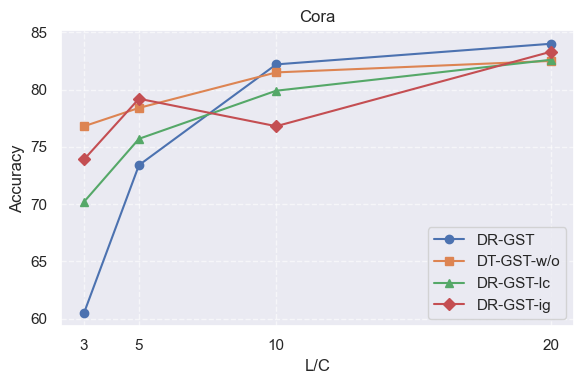

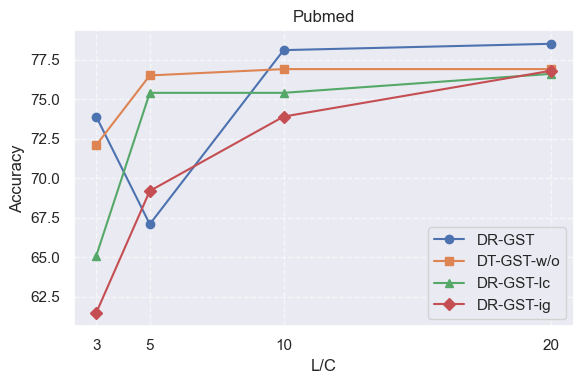

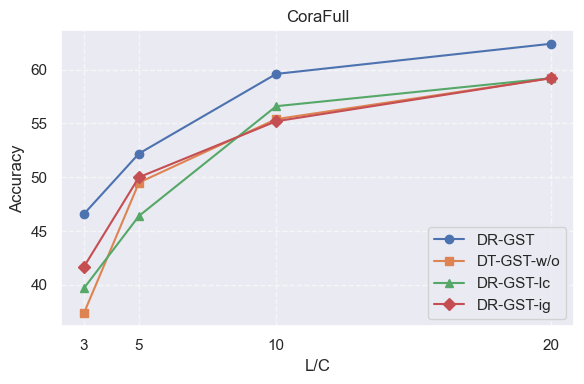

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
label_rates = [3, 5, 10, 20]
data_4  = {'Cora':{
        'Dropedge': {
            3: [[1.2764, 0.5840], [1.2701, 0.6000], [1.3112, 0.6050], [1.7294, 0.5620]],
            5: [[0.9150, 0.7340], [0.8562, 0.7330], [0.8861, 0.7340], [1.0144, 0.7140]],
            10: [[0.6976, 0.8060], [0.6062, 0.8220], [0.6163, 0.8130], [0.6231, 0.8090]],
            20: [[0.6117, 0.8150], [0.5604, 0.8320], [0.5578, 0.8400], [0.5671, 0.8290]],
        },
        'clean':{
            3:[[0.9887,0.6830],[0.7595,0.7540],[0.7272,0.7680]],
            5:[[0.8115,0.7310],[0.6957,0.7840],[0.7223,0.7700]],
            10:[[0.7128,0.7780],[0.6418,0.8090],[0.6342,0.8150]],
            20:[[0.6380,0.7980],[0.5822,0.8220],[0.5777,0.8250]]},
        'T':{
            3:[[1.1138,0.6540],[0.9838,0.7020],[0.9705,0.6870]],
            5:[[0.8823,0.7120],[0.7580,0.7570],[0.7640,0.7500]],
            10:[[0.7403,0.7770],[0.6700,0.7990],[0.6757,0.7940]],
            20:[[0.6457,0.8050],[0.5765,0.8260],[0.5812,0.8220]]},
        'info_gain':{
            3:[[0.9853,0.6980],[0.8731,0.7360],[0.8919,0.7390]],
            5:[[0.9542,0.6990],[0.7298,0.7920],[0.6953,0.7900]],
            10:[[0.8831,0.6990],[0.7670,0.7480],[0.7326,0.7680]],
            20:[[0.6300,0.8110],[0.5642,0.8330],[0.5670,0.8260]]
        }},
        'Pubmed':{
        'Dropedge': {
            3: [[0.6992, 0.7290], [0.6831, 0.7390], [0.7030, 0.7120]],
            5: [[0.7701, 0.6710], [0.7845, 0.6620], [0.9509, 0.6070]],
            10: [[0.5877, 0.7560], [0.5520, 0.7770], [0.5505, 0.7810]],
            20: [[0.5566, 0.7850], [0.5462, 0.7850], [0.6033, 0.7700]],
        },
        'clean':{
            3:[[0.6968,0.7210],[0.7288,0.6800],[0.8520,0.6610]],
            5:[[0.6408,0.7540],[0.6185,0.7650],[0.6786,0.7520]],
            10:[[0.5557,0.7690],[0.5993,0.7560],[0.6860,0.7390]],
            20:[[0.5726,0.7690],[0.5906,0.7610],[0.6836,0.7260]]},
        'T':{
            3:[[0.8079,0.6510],[0.8886,0.6230],[0.9173,0.6090]],
            5:[[0.6020,0.7540],[0.6402,0.7470],[0.7130,0.6970]],
            10:[[0.6027,0.7540],[0.7932,0.7180],[0.8185,0.6880]],
            20:[[0.5731,0.7660],[0.5844,0.7520],[0.6528,0.7350]]},
        'info_gain':{
            3:[[0.7871,0.6150],[0.7858,0.6080],[0.8471,0.5750]],
            5:[[0.6937,0.6920],[0.7528,0.6810],[0.8538,0.6420]],
            10:[[0.6086,0.7390],[0.6497,0.7290],[0.7369,0.6960]],
            20:[[0.5707,0.7680],[0.5641,0.7670],[0.6109,0.7610]]
        }},
        'CoraFull':{
        'Dropedge': {
            3: [[2.3282, 0.4460], [2.2593, 0.4610], [2.6969, 0.4660]],
            5: [[2.0994, 0.4920], [1.9570, 0.5200], [2.0159, 0.5220]],
            10: [[1.7631, 0.5680], [1.6843, 0.5960], [1.7170, 0.5920]],
            20: [[1.5605, 0.6010], [1.4944, 0.6240], [1.5767, 0.6120]],
        },
        'clean':{
            3:[[2.7043,0.3650],[2.6219,0.3740],[4.1449,0.1500]],
            5:[[2.2143,0.4730],[2.1561,0.4950],[3.0757,0.4620]],
            10:[[1.9287,0.5360],[1.9360,0.5540],[2.8940,0.5020]],
            20:[[1.6256,0.5880],[1.7279,0.5920],[2.0863,0.5580]]
        },
        'T':{
            3:[[2.7110,0.3930],[2.6713,0.3970],[4.1256,0.1260]],
            5:[[2.2525,0.4540],[2.2737,0.4640],[2.9749,0.4120]],
            10:[[1.8165,0.5530],[1.8330,0.5660],[2.6921,0.5060]],
            20:[[1.6042,0.5850],[1.7028,0.5920],[2.7089,0.5800]]
        },
        'info_gain':{
            3:[[2.5944,0.4170],[2.4727,0.4100],[4.0111,0.2970]],
            5:[[2.0892,0.4840],[2.0506,0.5000],[3.1665,0.4560]],
            10:[[1.8954,0.5180],[1.8874,0.5520],[2.5131,0.5240]],
            20:[[1.6032,0.5800],[1.7466,0.5920],[1.9877,0.5680]]
        }}
        }

max_data= {}

for ds in ['Cora', 'Pubmed', 'CoraFull']:
    max_data[ds] = {}
    for method, lr_dict in data_4[ds].items():
        max_data[ds][method] = [
            (np.max([run[1] for run in lr_dict[lr]]) * 100) if lr in lr_dict and lr_dict[lr] else np.nan
            for lr in label_rates
        ]
# mean_data = {}

# for ds in ['Cora', 'Pubmed', 'CoraFull']:
#     mean_data[ds] = {}
#     for method, lr_dict in data_3[ds].items():
#         mean_data[ds][method] = [
#             (np.mean([run[1] for run in lr_dict[lr]]) * 100) if lr in lr_dict and lr_dict[lr] else np.nan
#             for lr in label_rates
#         ]
# fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
# markers = ['o', 's', '^', 'D', 'v', 'P', 'X', '*']
markers = ['o', 's', '^', 'D']
label_dict = {'Dropedge':'DR-GST','T':"DR-GST-lc",'info_gain':"DR-GST-ig",'clean':"DT-GST-w/o"}

for ds in ['Cora', 'Pubmed', 'CoraFull']:  # 加上 Citeseer 如果有
    plt.figure(figsize=(6, 4))  # 每张图单独设置大小
    for mk, method in zip(markers, max_data[ds].keys()):
        plt.plot(label_rates, max_data[ds][method], marker=mk, label=label_dict[method])

# for ds in ['Cora', 'Pubmed', 'CoraFull']:  # 加上 Citeseer 如果有
#     plt.figure(figsize=(6, 4))  # 每张图单独设置大小
#     for mk, method in zip(markers, mean_data[ds].keys()):
#         plt.plot(label_rates, mean_data[ds][method], marker=mk, label=label_dict[method])
    plt.title(ds)
    plt.xlabel('L/C')
    plt.ylabel('Accuracy')  # 你图里是 Accuracy 不是 Best Accuracy
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(label_rates)
    plt.legend(loc='lower right')
    plt.tight_layout()